## Overfitting 

### Step 1

* Definition: Technical definition using formulas or equations
* Description: Written explanation (1–2 sentences)
* Demonstration: Numerical example using real-world data (or simulated data if
not found)
* Diagram: Visual example using real-world data (using same data as above)
* Diagnosis: How to recognize or test that the problem exists
* Damage: Clear statement of the damaged caused by the problem
* Directions: Suggested models

### Definition

Overfitting is an attribute of model which makes it too closely fitted to the training data. This causes a model to perform fairly on the training data but poorly on the test data. It becomes difficult to generalize the model

### Description
There are different scenarios in which overfitting might occur. One problem might be choosing bad sample and other might be choosing too many independent variables.

### Demonstration 

We can use a simple set of trainig and test data to demonstrate the problem. Lets say following is our dataset and we try to create a data model based on the subset of the data and test the

In [113]:
y = np.array([1,   4 , 8 , 17 , 24, 34, 42, 49, 53, 62]) 
X= np.array([[1],[2],[3],[4],[5],[6], [7], [8],[9],[10]])

In [114]:
train_size = 6 

In [116]:
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [119]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

Now lets create two model one simulating 


$y = a*x +c  $

and other using 

$y = a*x^2 +c $

We'll create two regressor from sklearn library evaluate the model based on mean square errors and see which model is giving best result based on train data and then to demonstrate the problem we'll run the same model on the test data 


#### Linear Model on Train Data 

In [150]:
regrssion_lin = LinearRegression()
result_lin = regrssion_lin.fit(X_test, y_test)

In [151]:
mean_squared_error(regrssion_lin.predict(X_test), y_test)

1.05

#### Quadratic Model on train Data 

In [152]:
regrssion_quad = LinearRegression()

In [153]:
result_quad = regrssion_quad.fit(X_train*X_train, y_train)

In [154]:
mean_squared_error(regrssion_quad.predict(X_train*X_train), y_train)

0.5478363444465142

#### Comparing result on the test Data 

Based on the mean square error metric it looks like The quadratic model is better fit for the data.
lets not focus on the test data and compare the same results on the test data

In [155]:
mean_squared_error(regrssion_lin.predict(X_test), y_test)

1.05

In [156]:
mean_squared_error(regrssion_quad.predict(X_test*X_test), y_test)

465.86885466642605

As we can see based on the same metric that is mean square error the quadratic model is performing much worse than the linear model

###  Diagram 

Lets demonstrate the data results by plotting actual and predicted result for both models.

In [157]:
%matplotlib inline

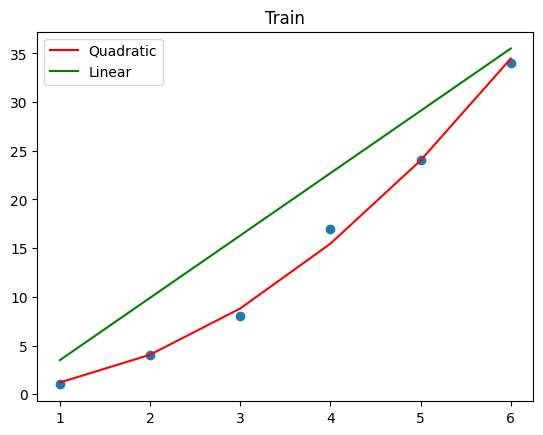

In [158]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regrssion_quad.predict(X_train*X_train), color='r', label='Quadratic')
plt.plot(X_train,regrssion_lin.predict(X_train), label ='Linear',color='g')
plt.title('Train')
plt.legend()

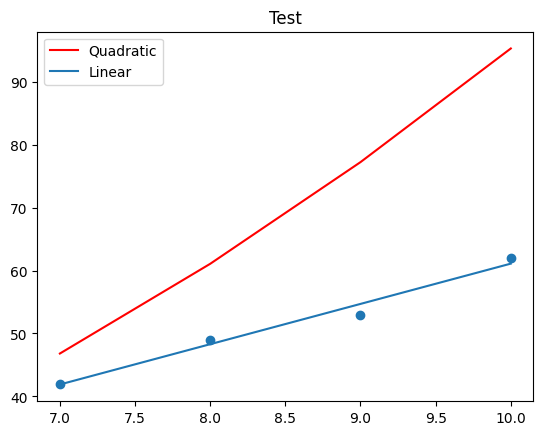

In [159]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regrssion_quad.predict(X_test*X_test), color='r', label='Quadratic')
plt.plot(X_test,regrssion_lin.predict(X_test), label ='Linear')
plt.title('Test')
plt.legend()

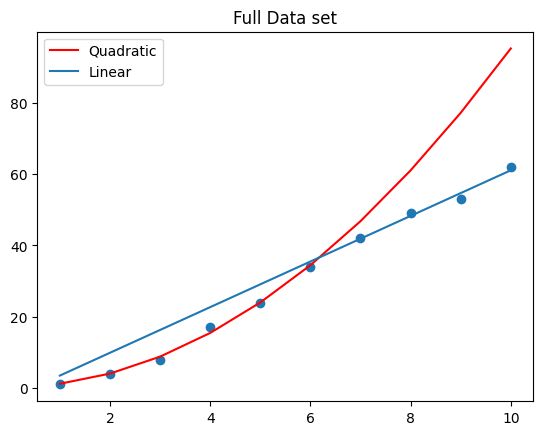

In [160]:
plt.scatter(X,y)
plt.plot(X,regrssion_quad.predict(X*X), color='r', label='Quadratic')
plt.plot(X,regrssion_lin.predict(X), label ='Linear')
plt.title('Full Data set')
plt.legend()

As we can see from above diagram the quadratic model clearly overfitted the train data and produced a model which performed badly on the test data.

### Diagnosis

We can identify the problem by comparing result on the test data we as we saw in the problem above. We can look at the complexity of the different models and compare the relative performance improvement on the coste of enhanced complexity. There will be a clear mismatch on the test data where overfitted model will perform poorly. 

### Damage

Overfitting causes a lot of damage. It provides a false sense of security that model will perform on the live or real data. While the sample collected might not be reflecting the realtime data

### Directions

There are different approaches to to diagnose the overfitting problems. The problem demonstrated above can be solved if we use a different training sample for our model. In Machine learning we use cross validation which uses different samples of data and that might solve above problem.
Similarly we can use penality terms to handle the problem of overfitting caused by the presence of too many independent variables. There are techniques like LASSO and Ridge regressions which can be sued for the same purpose.